# An example of using candex with source netCDF files in regular Latitude and Longitude
## Remapping of GRACE to the location of the capital cities around the world

It seems the file exists; perhaps perviously downloaded; will skip downloading


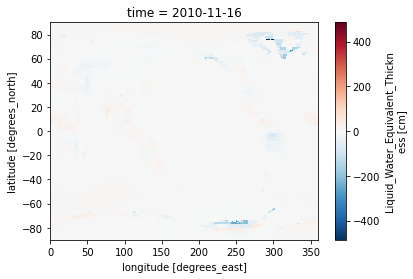

In [1]:
import xarray as xr
import urllib.request
import numpy as np
import pandas as pd
import os
from datetime import datetime
import time

# download GRACE data 
pwd = '/Users/shg096/Desktop/' # folder where downloaded SCDNA is save should be ending with '/'
fname = 'GRACE.nc'

def download_GRACE(pwd, filename):
    
    if not os.path.isdir(pwd):
        os.mkdir(pwd)
    
    # remove existing file is exists
    outfile = pwd+filename
    if os.path.isfile(outfile):
        print('It seems the file exists; perhaps perviously downloaded; will skip downloading')
    else:
        # download the file
        print('Downloading GRACE; this may take a while ...')
        print('Downloading starts at: ', datetime.now())
        url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/tellus/L3/mascon/RL06/JPL/v02/CRI/netcdf/GRCTellus.JPL.200204_202011.GLO.RL06M.MSCNv02CRI.nc?lon[0:1:719],lat[0:1:359],time[0:1:190],lwe_thickness[0:1:190][0:1:359][0:1:719],uncertainty[0:1:190][0:1:359][0:1:719],lat_bounds[0:1:359][0:1:1],lon_bounds[0:1:719][0:1:1],time_bounds[0:1:190][0:1:1]'
        urllib.request.urlretrieve(url, outfile)
        print('Downloading ends at: ', datetime.now())

# call the function
download_GRACE(pwd,fname)

# visualziation of the first time step of the result
ds = xr.open_dataset(pwd+fname)
ds_temp = ds.isel(time=100)
ds_temp.lwe_thickness.plot()


In [2]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex needed arguments
cndx.name_of_case              = 'capitals_GRACE'
cndx.temporary_candex_folder   = '../temporary/'
cndx.name_of_target_shp        = '../data/target_shapefiles/Capitals_point.shp' # all the world capitals
cndx.name_of_nc_files          = '/Users/shg096/Desktop/GRACE.nc' # ERA5 limited to North America and Caribbean
cndx.name_of_var_name          = ['lwe_thickness']
cndx.name_of_var_lon           = 'lon' 
cndx.name_of_var_lat           = 'lat'
cndx.name_of_var_time          = 'time'
cndx.name_of_nc_output_folder  = '../output/'
cndx.format_list               =  ['f4']
cndx.fill_value_list           = ['-9999.00']
cndx.name_of_remap_file        = '/Users/shg096/Desktop/candex_newgen/temporary/capitals_GRACE_remapping.csv'

# execute candex
cndx.run_candex()



no  author name is provide and the author name is changes to (author name)!
remap file is provided; candex will use this file and skip calculation of remapping
candex case exists in the remap file
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'lat', 'lon']
candex detects that the longitude varibales has dimensions of:
['lon']
candex detects that the latitude varibales has dimensions of:
['lat']
Remapping /Users/shg096/Desktop/GRACE.nc to ../output/capitals_GRACE_remapped_2002-04-17-12-00-00.nc
Started at date and time 2021-02-17 20:31:31.274630
Ended   at date and time 2021-02-17 20:31:33.167549


35.673888627001304 51.42239817500899


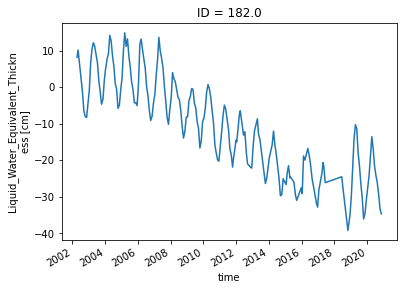

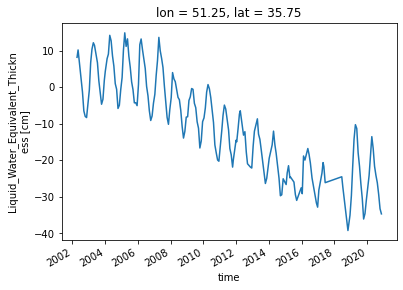

In [3]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

shp = gpd.read_file('/Users/shg096/Desktop/candex_newgen/temporary/capitals_GRACE_target_shapefile.shp')
shp = shp[shp['name']=='Tehran'] # get the data for Tehran

# plot found values from the ID of the city
plt.figure()
ds = xr.open_dataset('/Users/shg096/Desktop/candex_newgen/output/capitals_GRACE_remapped_2002-04-17-12-00-00.nc');
ds_slice = ds.sel(ID = shp.ID_t.iloc[0]) # slice the data for tehran
# plot the data
ds_slice.lwe_thickness.plot()

# plot found values form the lat lon of the city from the source file
plt.figure()
ds = xr.open_dataset('/Users/shg096/Desktop/GRACE.nc')
print(shp.lat_t.iloc[0], shp.lon_t.iloc[0])
if shp.lon_t.iloc[0] > 0:
    ds_slice = ds.sel(lat = shp.lat_t.iloc[0], lon = shp.lon_t.iloc[0]     , method ='nearest' )
else:
    ds_slice = ds.sel(lat = shp.lat_t.iloc[0], lon = shp.lon_t.iloc[0]+ 360, method ='nearest' )
ds_slice.lwe_thickness.plot()

